#**GTC ML Project 1 (Hotel Bookings)**






## 🔽 Importing & Loading the dataset from Kaggle

In [53]:
!pip install -q kaggle

from google.colab import files
uploaded = files.upload()

# move kaggle.json and secure it
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# download hotel bookings dataset
!kaggle datasets download -d thedevastator/hotel-bookings-analysis -p /content

# unzip the downloaded file
!unzip /content/hotel-bookings-analysis.zip -d /content

# show what we downloaded and unzipped
!ls -la /content

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/thedevastator/hotel-bookings-analysis
License(s): other
  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 427MB/s]
Archive:  /content/hotel-bookings-analysis.zip
  inflating: /content/hotel_bookings.csv  
total 18576
drwxr-xr-x 1 root root     4096 Sep  5 15:02 .
drwxr-xr-x 1 root root     4096 Sep  5 11:45 ..
drwxr-xr-x 4 root root     4096 Sep  3 13:35 .config
-rw-r--r-- 1 root root  1570921 Dec  6  2023 hotel-bookings-analysis.zip
-rw-r--r-- 1 root root 17421967 Dec  6  2023 hotel_bookings.csv
drwxr-xr-x 2 root root     4096 Sep  5 15:02 .ipynb_checkpoints
-rw-r--r-- 1 root root       66 Sep  5 15:02 kaggle.json
drwxr-xr-x 1 root root     4096 Sep  3 13:36 sample_data


#📚Importing Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
5,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
6,6,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03-07-15
7,7,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03-07-15
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-15
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-15


#🔍**Phase 1: Exploratory Data Analysis**


*   Applying ***Descriptive Statistics***.
*   Checking dataset ***Shape*** & Number of ***Unique*** Values.
*   Checking num of ***Null values***.
*   Checking num of ***Duplicate Values***.
*   Checking & Visualizing ***Outliers***.



In [56]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

,count,mean,std,min,25%,50%,75%,max
index,119390.0,59694.500000,34465.068657,0.00,29847.25,59694.500,89541.75,119389.0
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0


In [57]:
print(df.shape)
print(df.dtypes.value_counts())

(119390, 33)
int64      17
object     12
float64     4
Name: count, dtype: int64


In [58]:
if df.duplicated().sum() == 0 :
  print("No Duplicates👍")
else :
  print("Duplicates Found👎 :"+ df.duplicated().sum())

No Duplicates👍


#⭐Checking only columns with missing values and their percentage

In [59]:
missing_table = pd.DataFrame({
 "Missing Values": df.isnull().sum(),
 "Percentage ": df.isnull().mean().mul(100)
 }).loc[lambda x: x["Missing Values"] > 0].sort_values("Percentage ")
missing_table

,Missing Values,Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


#⭐Using `missingo` Library to visualize distribution of Null values.

<Axes: >

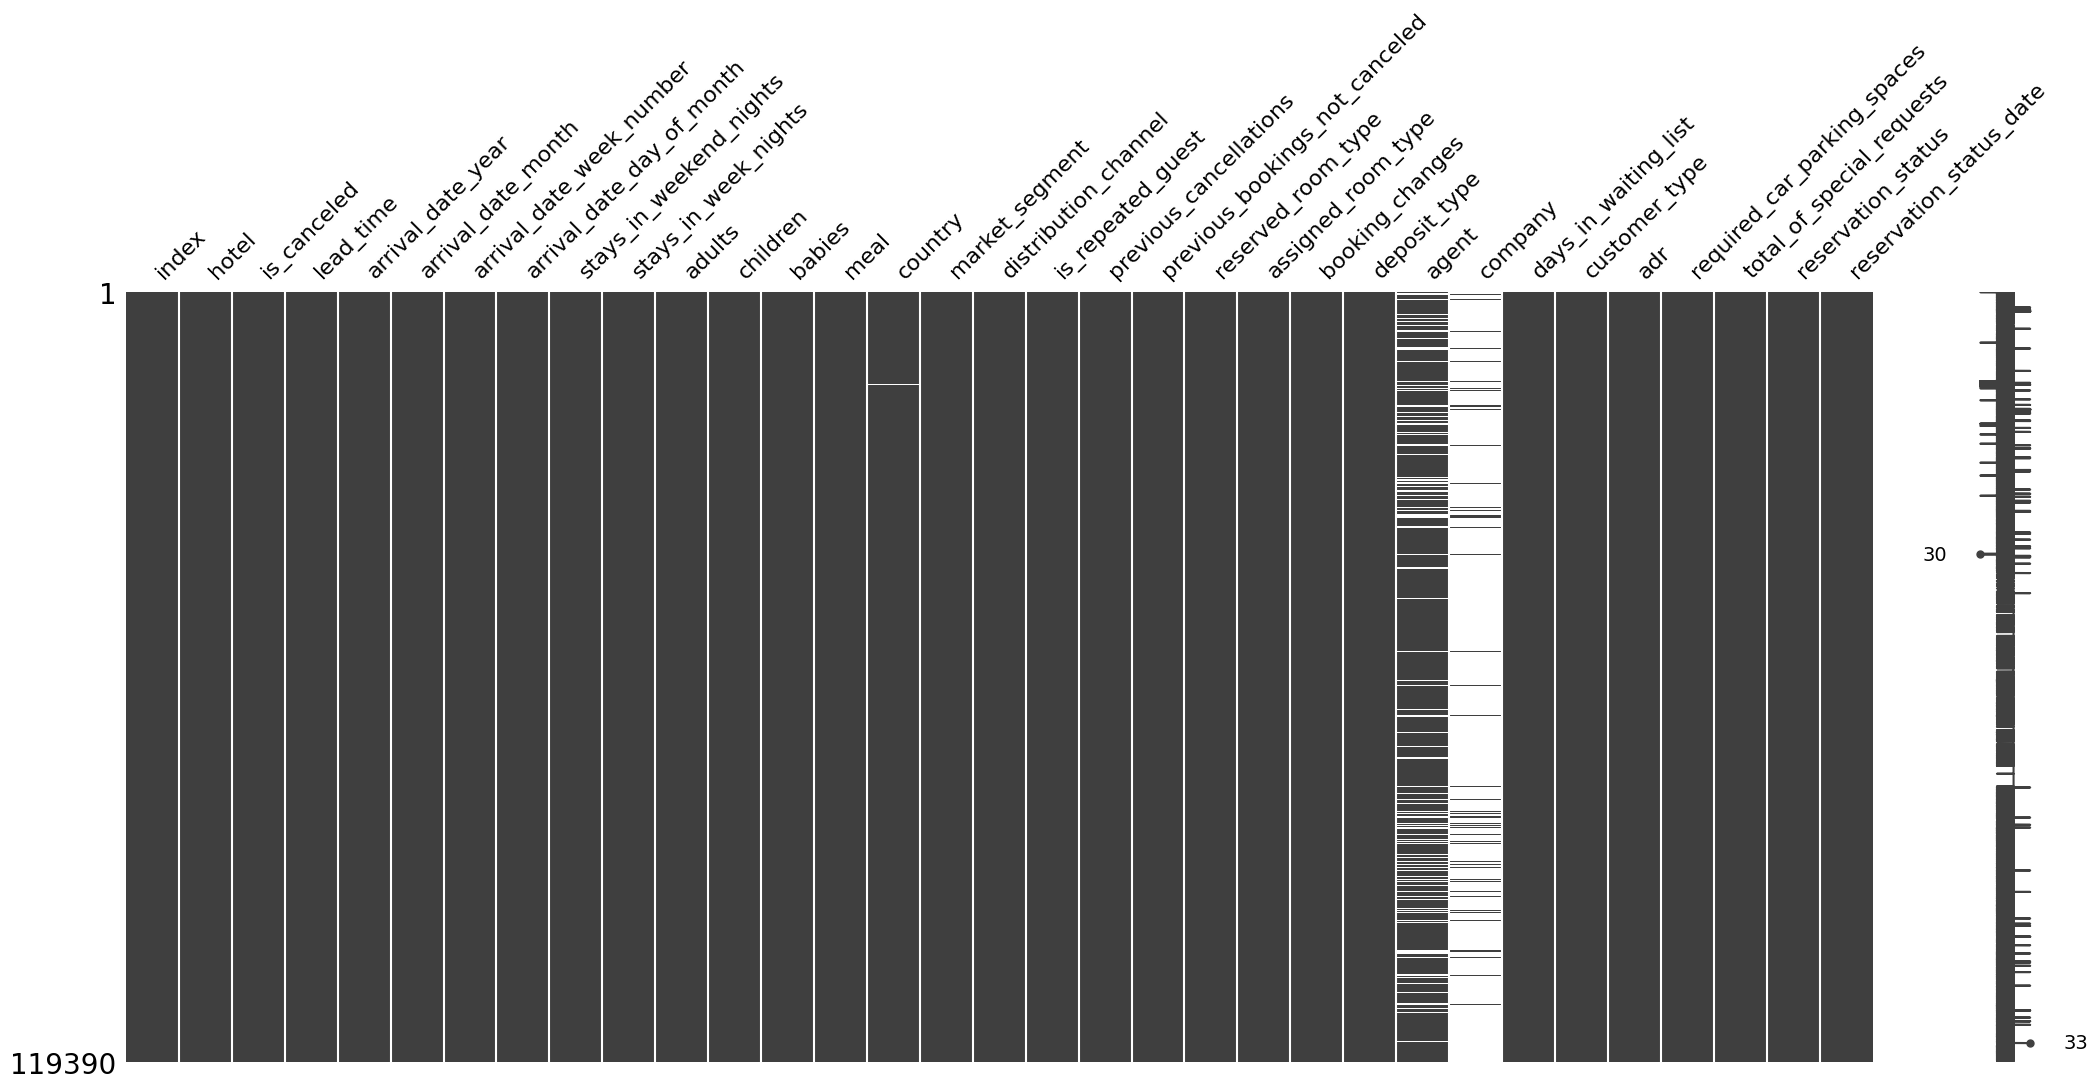

In [60]:
import missingno as msno
msno.matrix(df)

<Axes: >

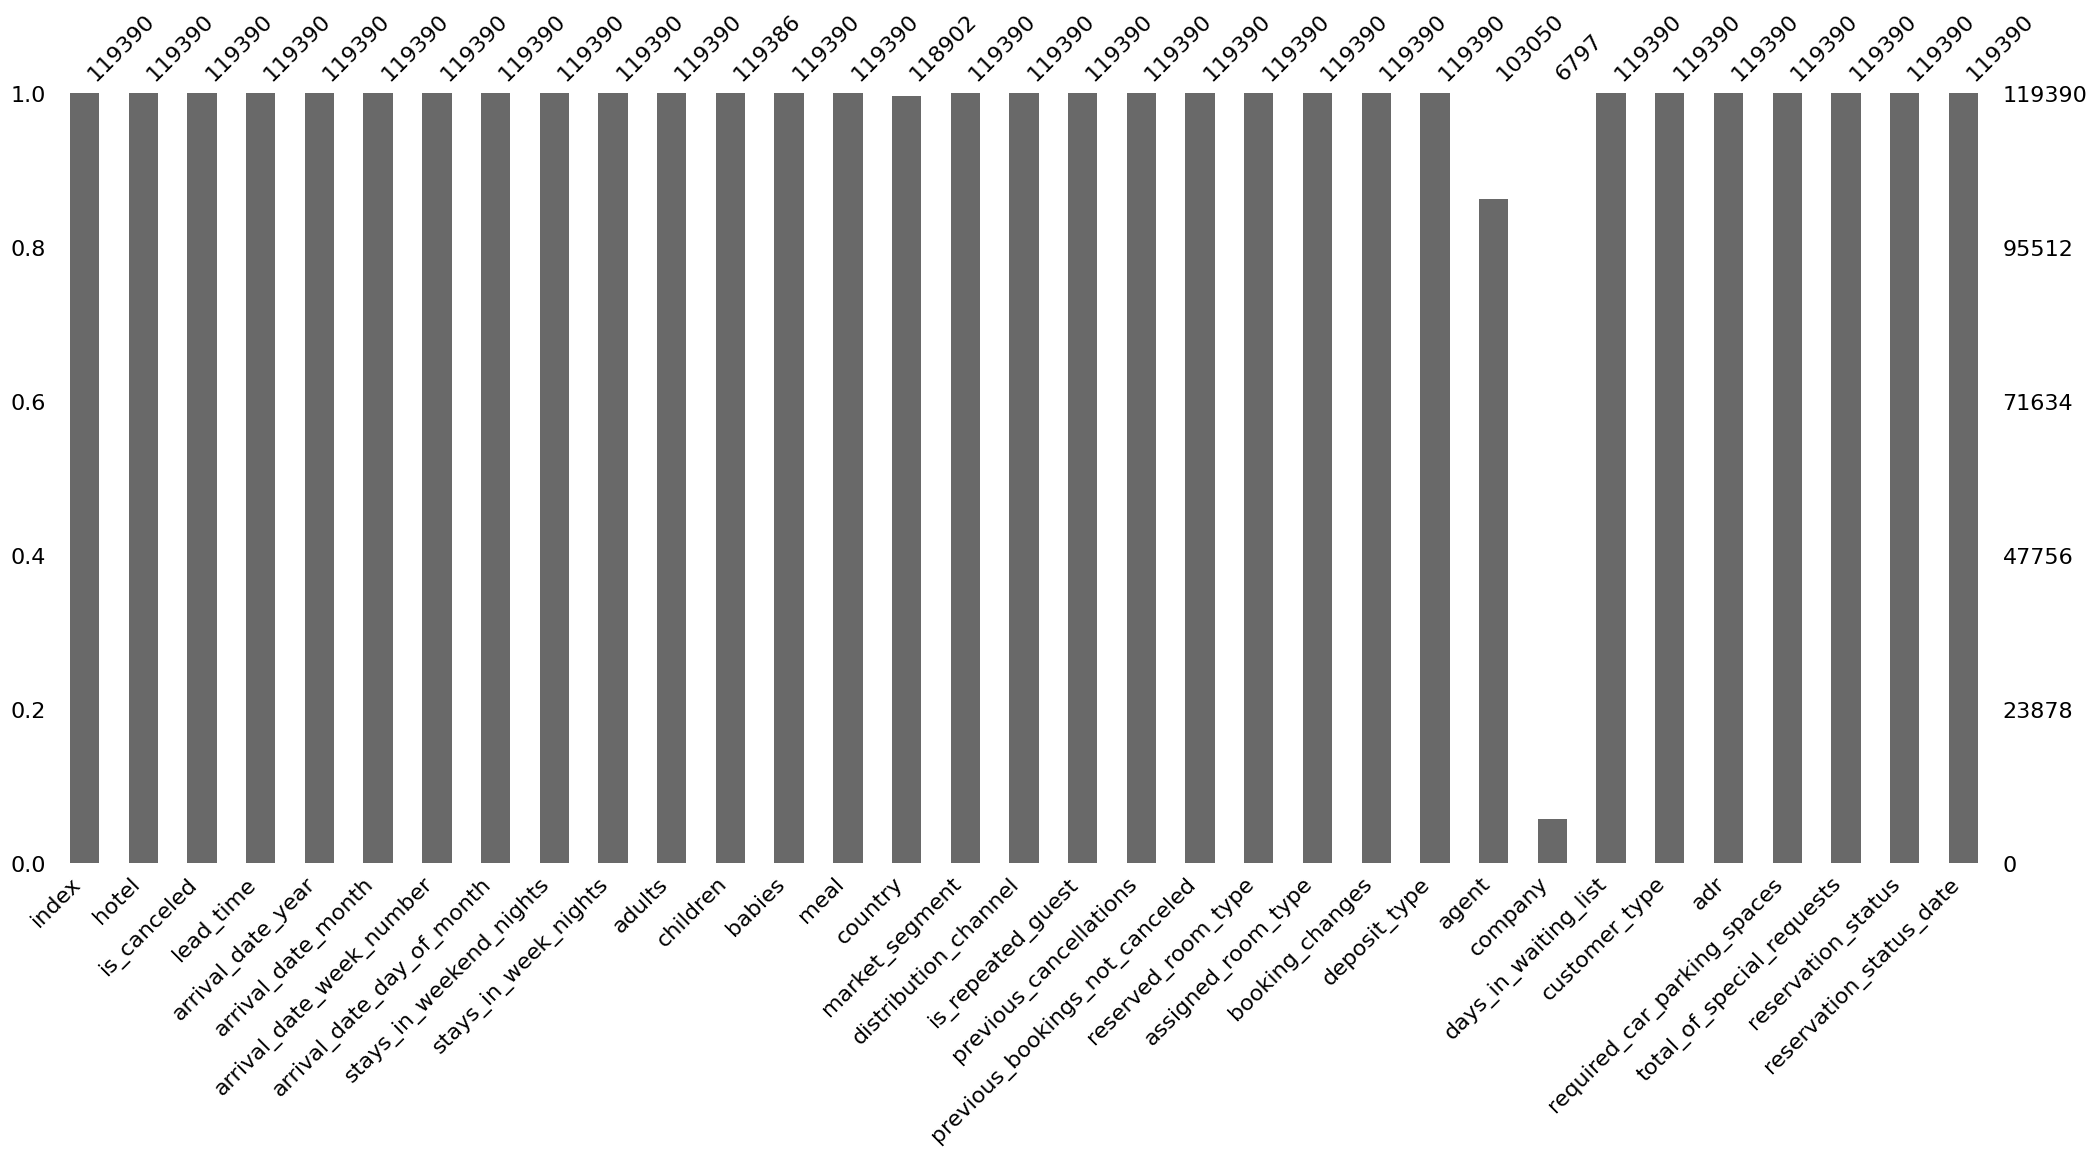

In [61]:
msno.bar(df)

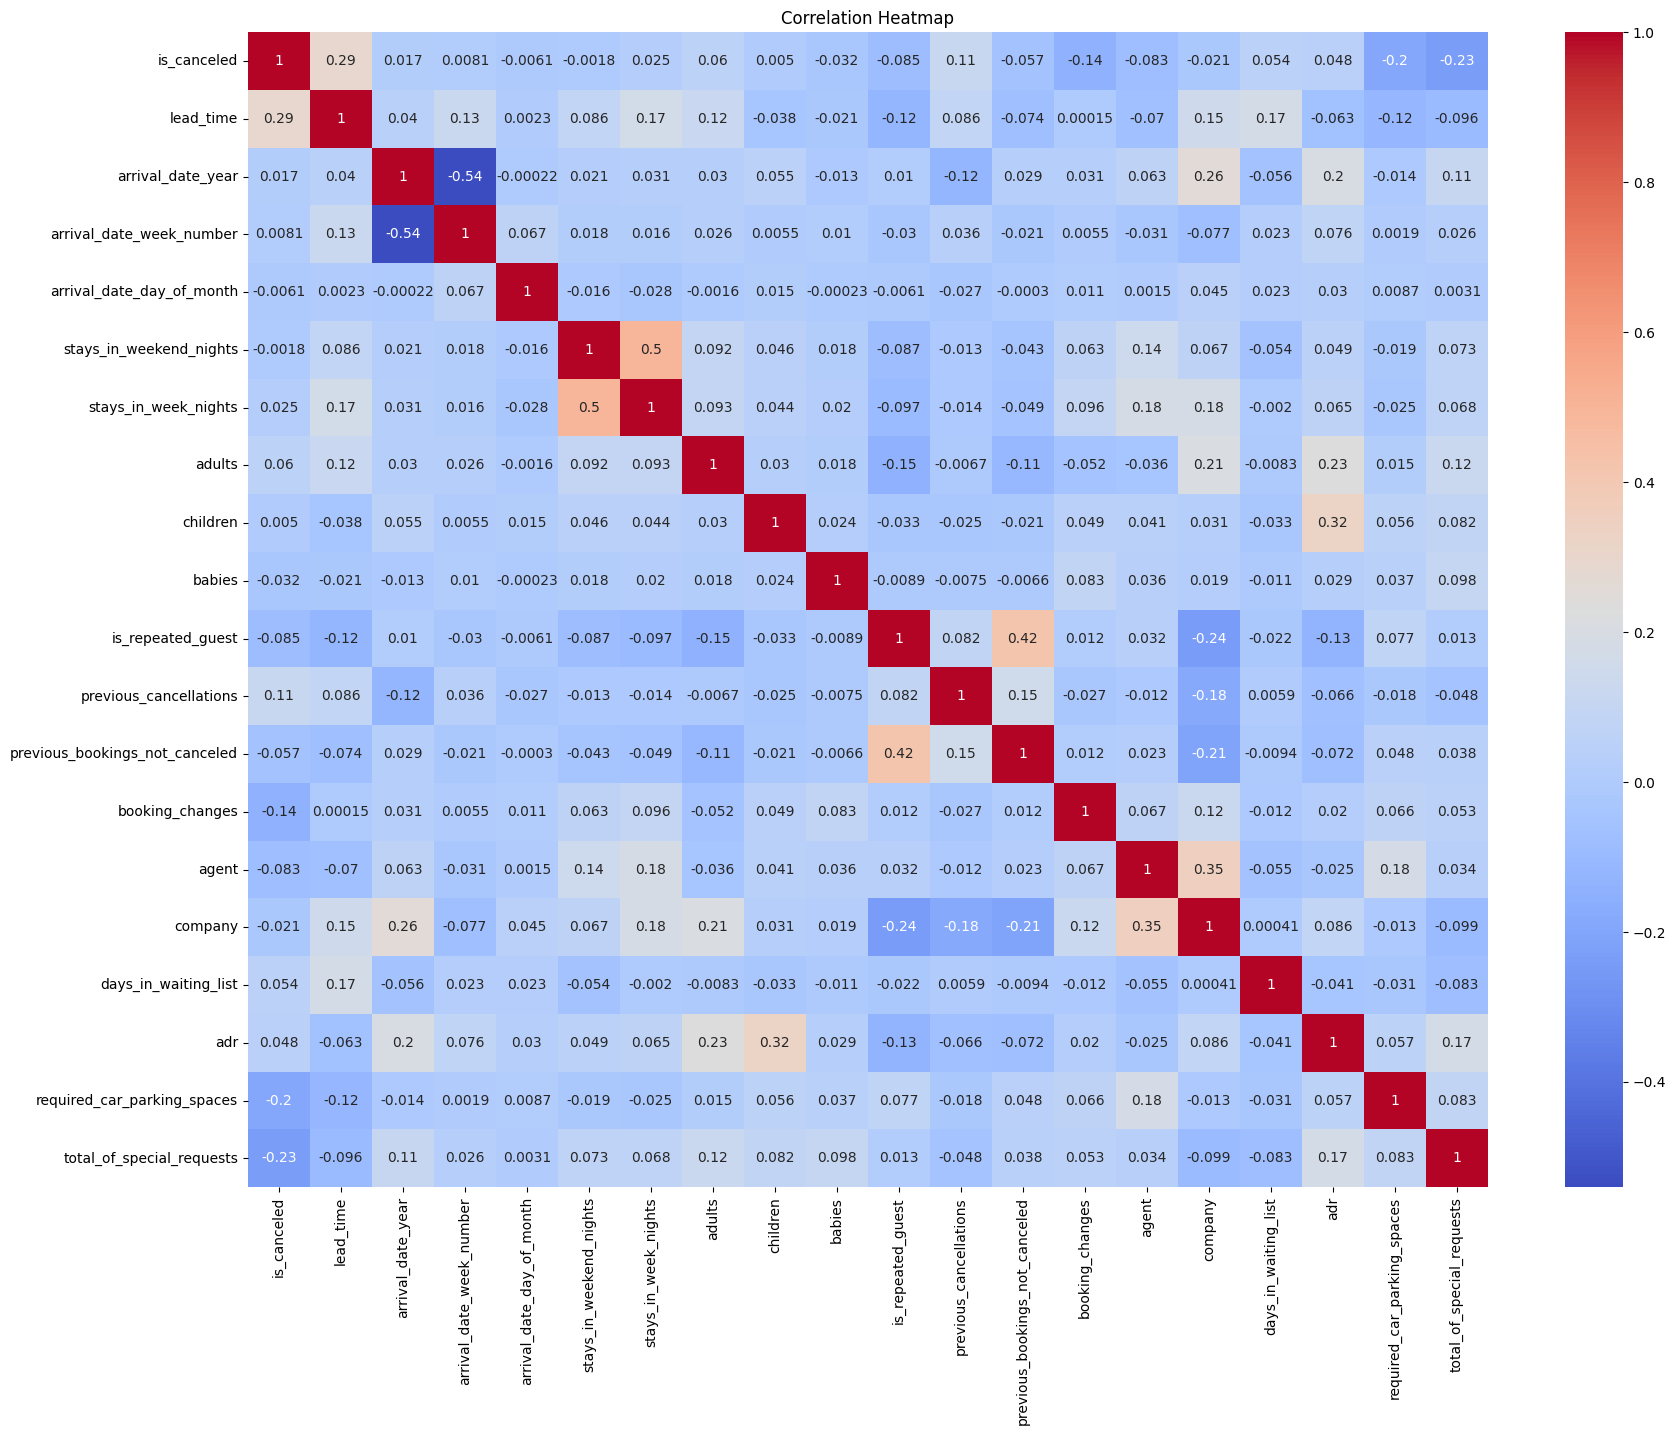

In [62]:
numeric_df = df.select_dtypes(include=['int64','float64']).drop('index', axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [63]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_columns = []
for col in numeric_columns:
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers in column '{col}': {len(outliers)}")
    outlier_columns.append(col)
  else:
    print(f"Outliers in column '{col}': 0")

Outliers in column 'index': 0
Outliers in column 'is_canceled': 0
Outliers in column 'lead_time': 3005
Outliers in column 'arrival_date_year': 0
Outliers in column 'arrival_date_week_number': 0
Outliers in column 'arrival_date_day_of_month': 0
Outliers in column 'stays_in_weekend_nights': 265
Outliers in column 'stays_in_week_nights': 3354
Outliers in column 'adults': 29710
Outliers in column 'children': 8590
Outliers in column 'babies': 917
Outliers in column 'is_repeated_guest': 3810
Outliers in column 'previous_cancellations': 6484
Outliers in column 'previous_bookings_not_canceled': 3620
Outliers in column 'booking_changes': 18076
Outliers in column 'agent': 0
Outliers in column 'company': 0
Outliers in column 'days_in_waiting_list': 3698
Outliers in column 'adr': 3793
Outliers in column 'required_car_parking_spaces': 7416
Outliers in column 'total_of_special_requests': 2877


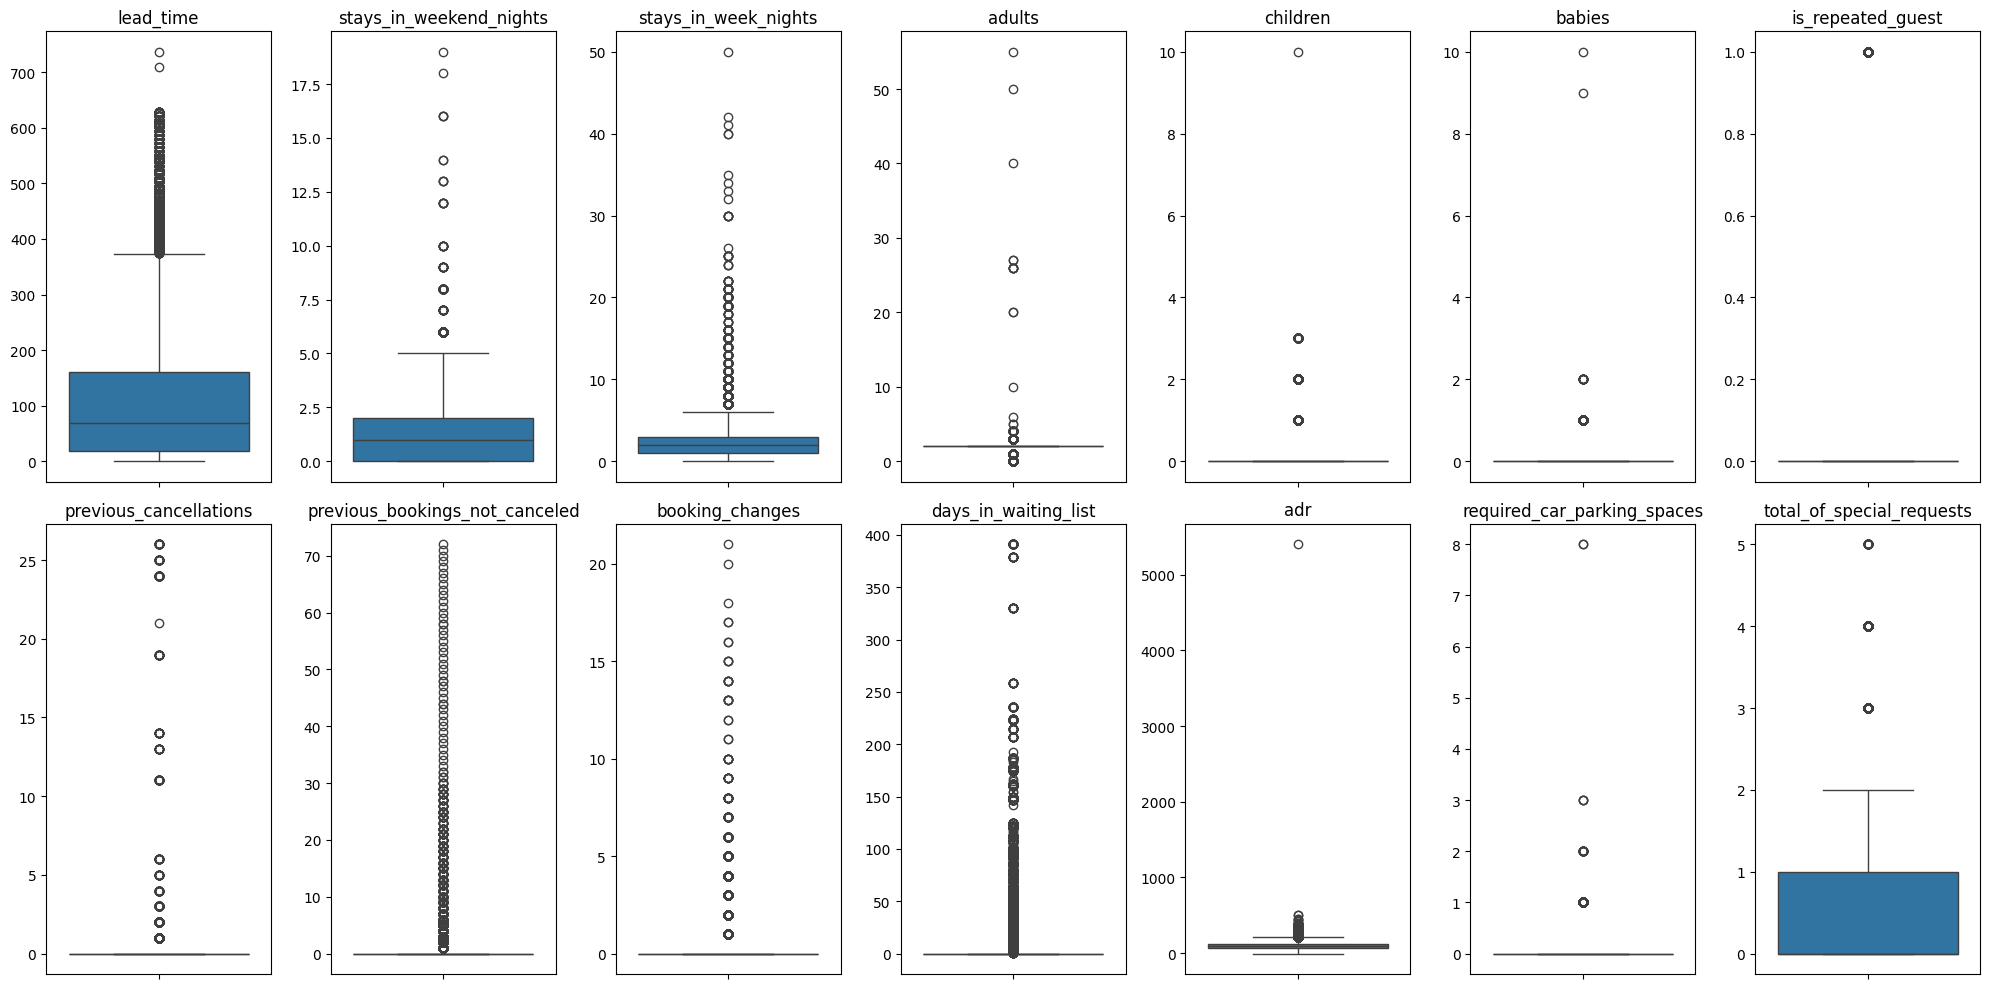

In [64]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = axes.flatten()
i = 0
for col in outlier_columns:
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_ylabel('')
  i += 1
plt.tight_layout()
plt.show()

# 🌟 Key Findings from Exploratory Data Analysis

Based on the analysis performed on the hotel bookings dataset, here are some key findings:

*   **Dataset Shape and Structure:** The dataset contains 119,390 entries and 33 columns, providing a sufficient amount of data for analysis.

*   **Missing Values:** Missing values are present in the `children`, `country`, `agent`, and `company` columns. The `company` column has a very high percentage of missing values (**94.31%**). The `agent` column also has a notable percentage of missing values (13.69%). `children` and `country` have a very small number of missing values.

*   **Duplicate Values:** No duplicate rows were found in the dataset👍.

*   **Unique Values and Data Types:** The `index`, `reservation_status` and `reservation_status_date` are useless to future predictions, therefore they will be dropped. Several columns like `hotel`, `is_canceled`, `is_repeated_guest`, `deposit_type`, and `customer_type` are low-cardinality categories and will be converted to the 'category' data type. Columns like `lead_time`, `arrival_date_week_number`, `arrival_date_day_of_month`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, and `total_of_special_requests` are numerical and show a range of unique values. `country` has a large number of unique values (177).

*   **Correlations:** The correlation heatmap revealed some notable relationships between numerical features:
    *   `lead_time` shows a moderate positive correlation with `days_in_waiting_list` and `previous_cancellations`.
    *   `stays_in_weekend_nights` and `stays_in_week_nights` are positively correlated, which is expected.
    *   `adults` is positively correlated with `stays_in_week_nights` and `adr`.
    *   `previous_cancellations` has a strong positive correlation with `is_canceled`.
    *   `required_car_parking_spaces` shows a weak negative correlation with `is_canceled`.
    *   `total_of_special_requests` shows a moderate negative correlation with `is_canceled`.

*   **Outliers:** Outliers were identified in several numerical columns, including `lead_time`, `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `previous_cancellations`, `previous_bookings_not_canceled`, `booking_changes`, `days_in_waiting_list`, `adr`, `required_car_parking_spaces`, and `total_of_special_requests`. These outliers are visible in the box plots and will be handled during the data preprocessing phase.

These findings provide a good foundation for further analysis and feature engineering.


---



#⚡**Phase 2: Data Cleaning**

*   Dropping unnecessary columns.
*   Handling Missing Values with strategy for each columns.
*   Handling outliers.
*   Fixing Data Types.


In [65]:
print("before: ")
df.head(10)

before: 


,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
5,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
6,6,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03-07-15
7,7,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03-07-15
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-15
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-15


#⭕Correcting Datatypes

In [66]:
df['is_canceled']= df['is_canceled'].astype('bool')
df['is_repeated_guest']= df['is_repeated_guest'].astype('bool')
#df['company'] = df['company'].astype('category')

cat_cols = ['hotel', 'meal', 'country', 'market_segment',
            'distribution_channel', 'reserved_room_type','assigned_room_type',
            'deposit_type','agent','company', 'customer_type']

for c in cat_cols:
  if c in df.columns:
    df[c]= df[c].astype('category')

In [67]:
unique_datatype_table = pd.DataFrame({
    "Data Type": df.dtypes,
    "Unique Values": df.nunique()
})
display(unique_datatype_table)

,Data Type,Unique Values
index,int64,119390
hotel,category,2
is_canceled,bool,2
lead_time,int64,479
arrival_date_year,int64,3
arrival_date_month,object,12
arrival_date_week_number,int64,53
arrival_date_day_of_month,int64,31
stays_in_weekend_nights,int64,17
stays_in_week_nights,int64,35


In [68]:
missing_table = pd.DataFrame({
 "Missing Values": df.isnull().sum(),
 "Percentage ": df.isnull().mean().mul(100)
 }).loc[lambda x: x["Missing Values"] > 0].sort_values("Percentage ")
missing_table

,Missing Values,Percentage
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [82]:
df.drop(columns=['index', 'reservation_status', 'reservation_status_date'] , inplace=True)

df['company'] = df['company'].cat.add_categories('Unknown').fillna('Unknown')
df['agent'] = df['agent'].cat.add_categories('Unknown').fillna('Unknown')

df['country'].fillna(df['country'].mode()[0], inplace=True)
df['children'].fillna(df['children'].mode()[0], inplace=True)

In [84]:
missing_table = pd.DataFrame({
 "Missing Values": df.isnull().sum(),
 "Percentage ": df.isnull().mean().mul(100)
 }).loc[lambda x: x["Missing Values"] > 0].sort_values("Percentage ")
if missing_table.empty == True:
  print("No Missing Values👍")
else:
 missing_table

No Missing Values👍


In [86]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,Unknown,0,Transient,75.0,0,0
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,Unknown,0,Transient,98.0,0,1
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,Unknown,0,Transient,98.0,0,1
6,Resort Hotel,False,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,Unknown,Unknown,0,Transient,107.0,0,0
7,Resort Hotel,False,9,2015,July,27,1,0,2,2,...,C,0,No Deposit,303.0,Unknown,0,Transient,103.0,0,1
8,Resort Hotel,True,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,240.0,Unknown,0,Transient,82.0,0,1
9,Resort Hotel,True,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,15.0,Unknown,0,Transient,105.5,0,0


# **⭐Observation**:
columns `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, `children`, `babies`, `is_repeated_guest`, `previous_cancel`, `previous_booking_not_canceled`, `book_changes`, `days_in_waiting_list`, `required_car_parking_space`, `total_of_special_request` hold real data that is important and required for model prediction in the future, therefore can't be dropped or capped.

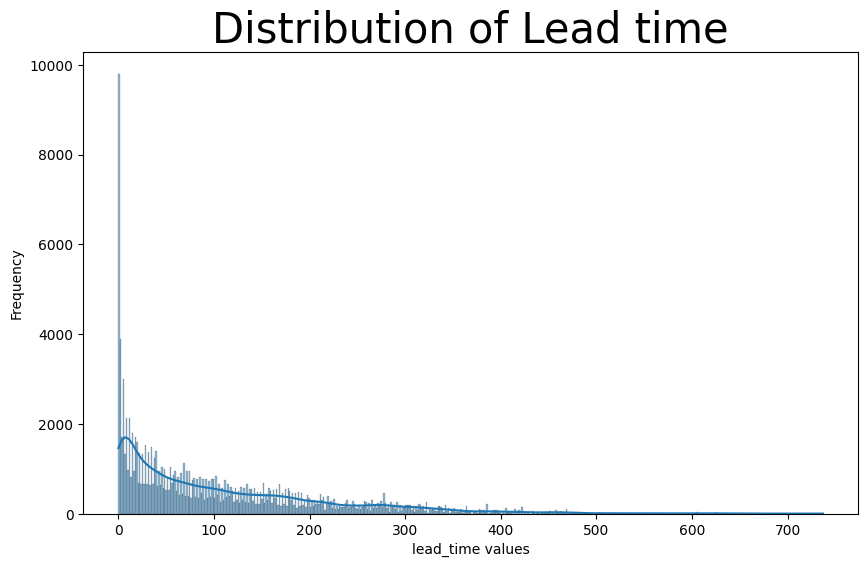

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=479, kde=True)
plt.title("Distribution of Lead time", fontsize= 30)
plt.xlabel('lead_time values')
plt.ylabel('Frequency')
plt.show()

In [89]:
# Capping Extreme Values
df['adr'] = df['adr'].clip(upper=1000)
ninety_ninth_percentile = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(upper=ninety_ninth_percentile)

#After Handling Outliers ✅

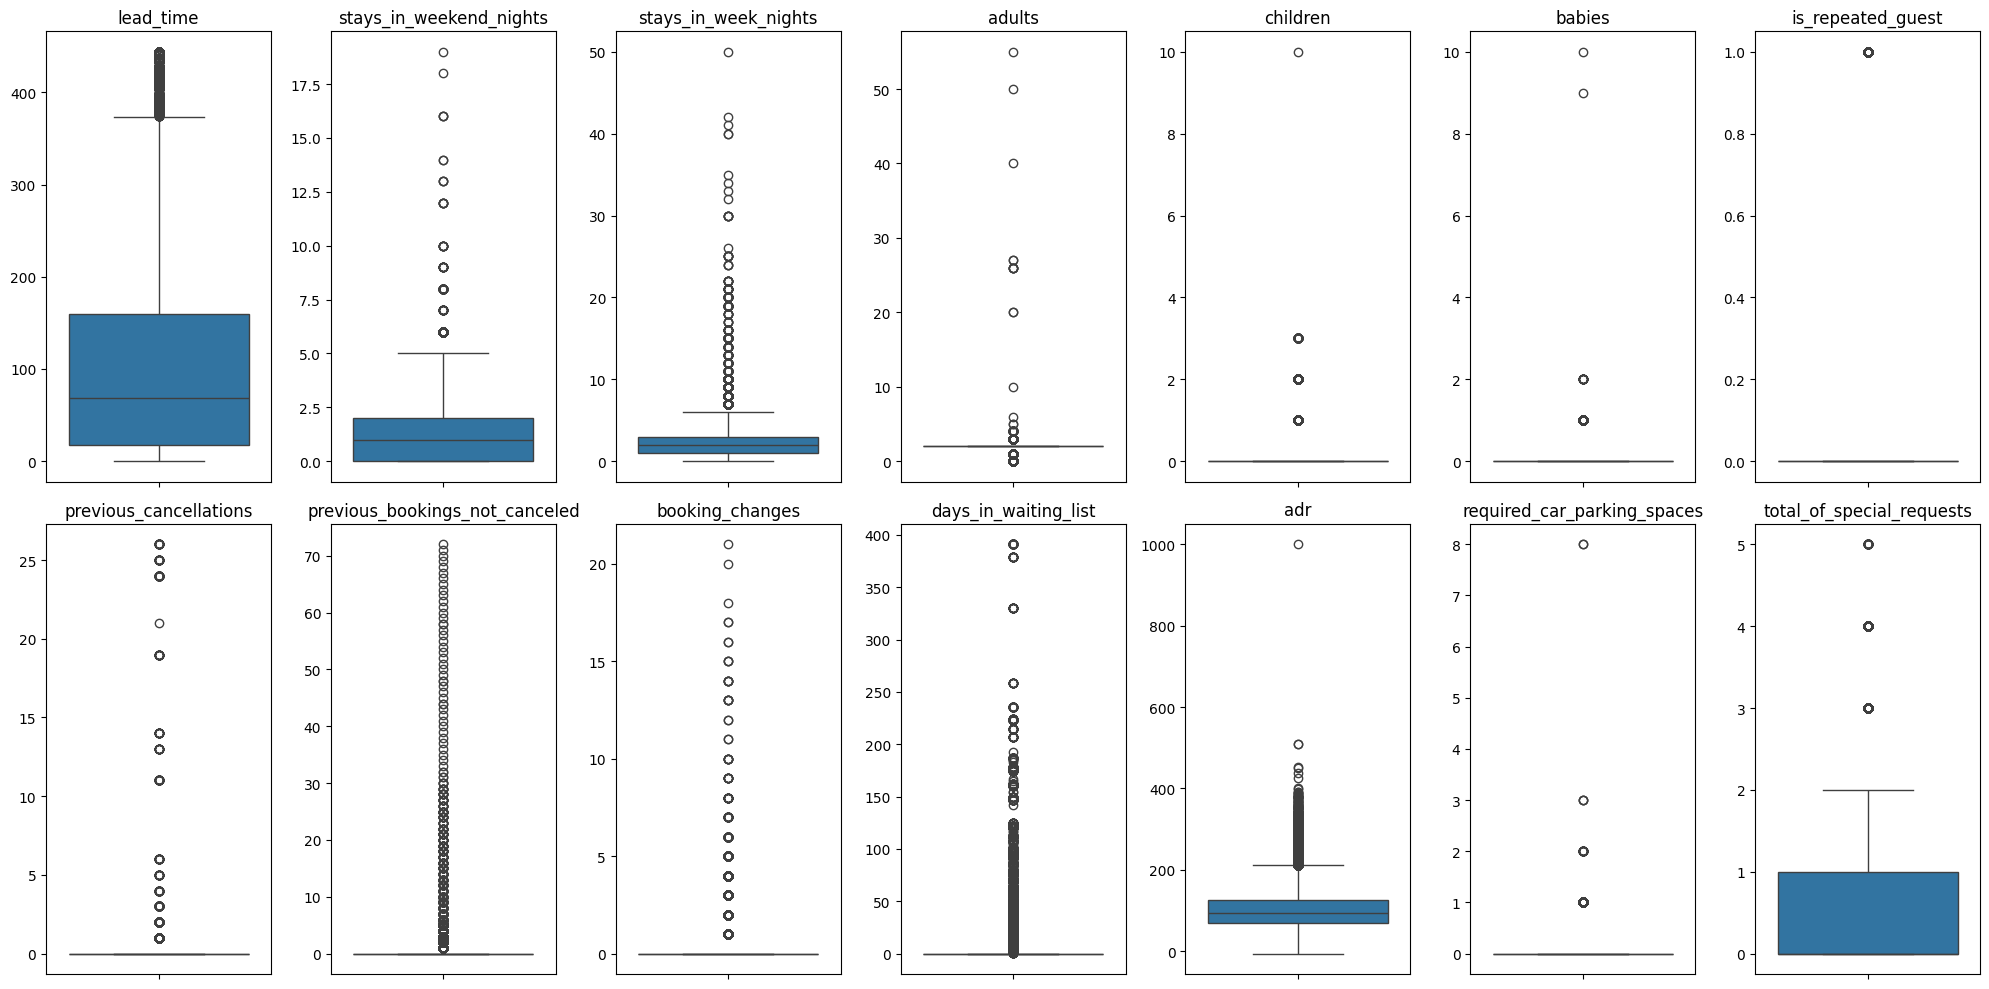

In [91]:
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = axes.flatten()
i = 0
for col in outlier_columns:
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_ylabel('')
  i += 1
plt.tight_layout()
plt.show()



---


#**🏢Phase 3: Feature Engineering & Preprocessing**
*  Create New Features
*  Encode Categorical Variables

#✨New Features:
*   `total_guests` = `adults` + `children` + `babies`
*   `total_nights` = `stay_in_weekend_nights` + `stay_in_week_nights`
*   `is_family` = indicate if booking contains `children` or `babies`.

In [92]:
df['total_guests'] = df['adults'] + df['babies'] + df['children']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = (df['children'] > 0) | (df['babies'] > 0)

In [94]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  bool    
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_nights,is_family
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,Unknown,Unknown,0,Transient,0.0,0,0,2.0,0,False
1,Resort Hotel,False,444,2015,July,27,1,0,0,2,...,Unknown,Unknown,0,Transient,0.0,0,0,2.0,0,False
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,Unknown,Unknown,0,Transient,75.0,0,0,1.0,1,False
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,304.0,Unknown,0,Transient,75.0,0,0,1.0,1,False
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,240.0,Unknown,0,Transient,98.0,0,1,2.0,2,False
5,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,240.0,Unknown,0,Transient,98.0,0,1,2.0,2,False
6,Resort Hotel,False,0,2015,July,27,1,0,2,2,...,Unknown,Unknown,0,Transient,107.0,0,0,2.0,2,False
7,Resort Hotel,False,9,2015,July,27,1,0,2,2,...,303.0,Unknown,0,Transient,103.0,0,1,2.0,2,False
8,Resort Hotel,True,85,2015,July,27,1,0,3,2,...,240.0,Unknown,0,Transient,82.0,0,1,2.0,3,False
9,Resort Hotel,True,75,2015,July,27,1,0,3,2,...,15.0,Unknown,0,Transient,105.5,0,0,2.0,3,False


#**Encoding Categorical Variables**

In [101]:
from sklearn.preprocessing import OneHotEncoder

# Columns for Frequency Encoding
frequency_cols = ['country', 'agent', 'company']

# Apply Frequency Encoding
for col in frequency_cols:
    if col in df.columns:
        # Ensuring the column is of a type that supports value_counts, convert if necessary
        if not (pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):
             df[col] = df[col].astype(str) # Convert to string if not object or category

        frequency_map = df[col].value_counts(normalize=True)
        df[col] = df[col].map(frequency_map)


# Columns for One-Hot Encoding
one_hot_cols = [
    'hotel',
    'arrival_date_month',
    'meal',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
]

# Ensure selected columns are present in the DataFrame before encoding
cols_to_encode = [col for col in one_hot_cols if col in df.columns]

if cols_to_encode:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
    encoded_cols = encoder.fit_transform(df[cols_to_encode])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))

    # Drop original One-Hot encoded columns and concatenate the new ones
    df = df.drop(columns=cols_to_encode)
    df = pd.concat([df, encoded_df], axis=1)
else:
    print("No columns found to apply One-Hot Encoding.")


# Convert boolean columns to integer (0 or 1) - These should already be handled as per previous steps
bool_cols = ['is_canceled', 'is_repeated_guest', 'is_family']
for col in bool_cols:
    if col in df.columns and df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


display(df.head(25))

/tmp/ipython-input-1100275193.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):
/tmp/ipython-input-1100275193.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):
/tmp/ipython-input-1100275193.py:10: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not (pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):


No columns found to apply One-Hot Encoding.


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,0,342,2015,27,1,0,0,2,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,444,2015,27,1,0,0,2,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,7,2015,27,1,0,1,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,14,2015,27,1,0,2,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,2015,27,1,0,2,2,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,9,2015,27,1,0,2,2,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,85,2015,27,1,0,3,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,75,2015,27,1,0,3,2,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**✂ Splitting the dataset into train and test sets.**

In [102]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (95512, 75) (95512,)
Testing set shape (X_test, y_test): (23878, 75) (23878,)
